In [1]:
import pandas as pd

etch = pd.read_csv('https://dl.dropboxusercontent.com/s/tc6s7f6xl05kwzh/etch_roof.csv?dl=1')
etch_weather = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/etch_roof_weather.csv')
etch_aq = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/etch_roof_aq.csv')

miramonte = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os.csv')
mm_weather = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os_weather.csv')
miramonte_aq = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os_aq.csv')

pinewood = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os.csv')
pw_weather = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os_weather.csv')
pw_aq = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os_aq.csv')

print("Etch Radiation:\n", etch.head(), "\n")
print("Etch Weather:\n", etch_weather.head(), "\n")
print("Miramonte Radiation:\n", miramonte.head(), "\n")
print("Miramonte Weather:\n", mm_weather.head(), "\n")
print("Pinewood Radiation:\n", pinewood.head(), "\n")
print("Pinewood Weather:\n", pw_weather.head())

Etch Radiation:
               deviceTime_utc           deviceTime_local  deviceTime_unix  cpm  \
0  2015-11-20 02:27:13+00:00  2015-11-19 18:27:13-08:00     1.447986e+09  4.0   
1  2015-11-20 02:32:13+00:00  2015-11-19 18:32:13-08:00     1.447987e+09  2.8   
2  2015-11-20 02:37:15+00:00  2015-11-19 18:37:15-08:00     1.447987e+09  3.4   
3  2015-11-20 02:42:15+00:00  2015-11-19 18:42:15-08:00     1.447987e+09  2.4   
4  2015-11-20 02:47:16+00:00  2015-11-19 18:47:16-08:00     1.447988e+09  3.4   

   cpmError  error_flag  
0  0.894427         NaN  
1  0.748331         NaN  
2  0.824621         NaN  
3  0.692820         NaN  
4  0.824621         NaN   

Etch Weather:
               deviceTime_utc           deviceTime_local  deviceTime_unix  \
0  2017-11-17 18:40:49+00:00  2017-11-17 10:40:49-08:00     1.510944e+09   
1  2017-11-17 18:45:49+00:00  2017-11-17 10:45:49-08:00     1.510944e+09   
2  2017-11-17 18:50:49+00:00  2017-11-17 10:50:49-08:00     1.510945e+09   
3  2017-11-17 18:55

In [2]:
import pandas as pd
import numpy as np

etch = pd.read_csv('https://dl.dropboxusercontent.com/s/tc6s7f6xl05kwzh/etch_roof.csv?dl=1')
etch_weather = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/etch_roof_weather.csv')
etch_aq = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/etch_roof_aq.csv')

miramonte = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os.csv')
mm_weather = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os_weather.csv')
miramonte_aq = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os_aq.csv')

pinewood = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os.csv')
pw_weather = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os_weather.csv')
pw_aq = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os_aq.csv')

def prepare_data(radiation, weather, aq):
    df = pd.merge_asof(radiation.sort_values('deviceTime_unix'),
                       weather.sort_values('deviceTime_unix'),
                       on='deviceTime_unix', direction='nearest')
    df = pd.merge_asof(df.sort_values('deviceTime_unix'),
                       aq.sort_values('deviceTime_unix'),
                       on='deviceTime_unix', direction='nearest')
    df['datetime'] = pd.to_datetime(df['deviceTime_unix'], unit='s')
    return df[(df['datetime'] >= '2018-01-01') & (df['datetime'] <= '2018-08-31')]

etch_filtered = prepare_data(etch, etch_weather, etch_aq)
miramonte_filtered = prepare_data(miramonte, mm_weather, miramonte_aq)
pinewood_filtered = prepare_data(pinewood, pw_weather, pw_aq)

def compute_stats(df, label):
    cpm = df['cpm'].dropna()
    mean = cpm.mean()
    measured_std = cpm.std()
    theoretical_std = np.sqrt(mean)
    diff = measured_std - theoretical_std

    print(f"\n {label} Radiation Statistics (Jan–Aug 2018):")
    print(f"  Mean CPM (μ): {mean:.3f}")
    print(f"  Measured Std Dev (σ_measured): {measured_std:.3f}")
    print(f"  Theoretical Std Dev (σ_theoretical = √μ): {theoretical_std:.3f}")
    print(f"  Difference (σ_measured - σ_theoretical): {diff:.3f}")

compute_stats(etch_filtered, "Etch Roof")
compute_stats(miramonte_filtered, "Miramonte")
compute_stats(pinewood_filtered, "Pinewood")



 Etch Roof Radiation Statistics (Jan–Aug 2018):
  Mean CPM (μ): 2.666
  Measured Std Dev (σ_measured): 0.754
  Theoretical Std Dev (σ_theoretical = √μ): 1.633
  Difference (σ_measured - σ_theoretical): -0.879

 Miramonte Radiation Statistics (Jan–Aug 2018):
  Mean CPM (μ): 2.060
  Measured Std Dev (σ_measured): 2.040
  Theoretical Std Dev (σ_theoretical = √μ): 1.435
  Difference (σ_measured - σ_theoretical): 0.605

 Pinewood Radiation Statistics (Jan–Aug 2018):
  Mean CPM (μ): 2.103
  Measured Std Dev (σ_measured): 0.978
  Theoretical Std Dev (σ_theoretical = √μ): 1.450
  Difference (σ_measured - σ_theoretical): -0.472


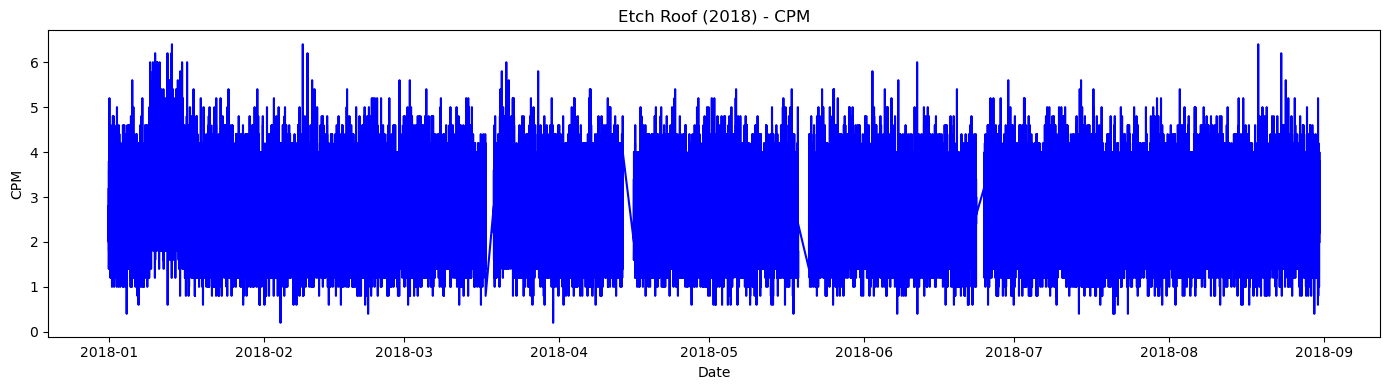

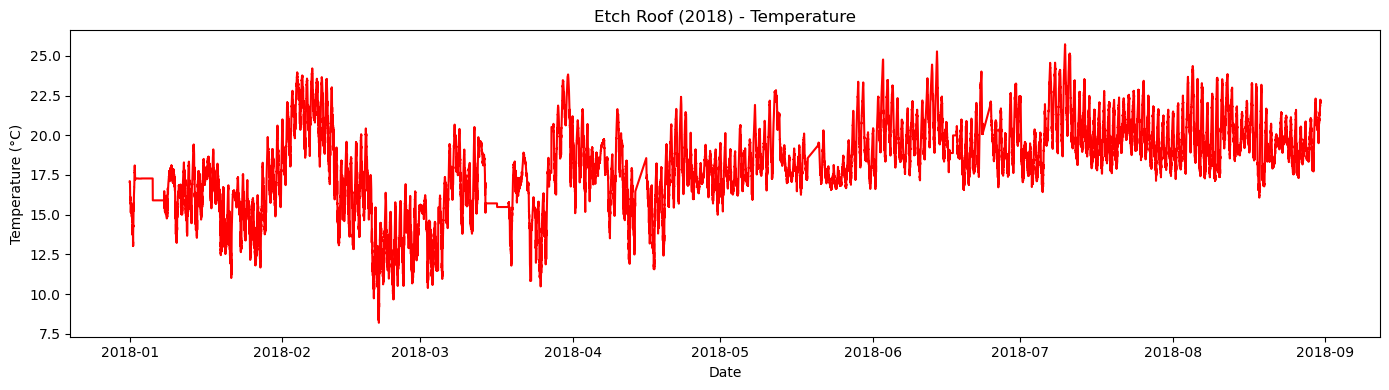

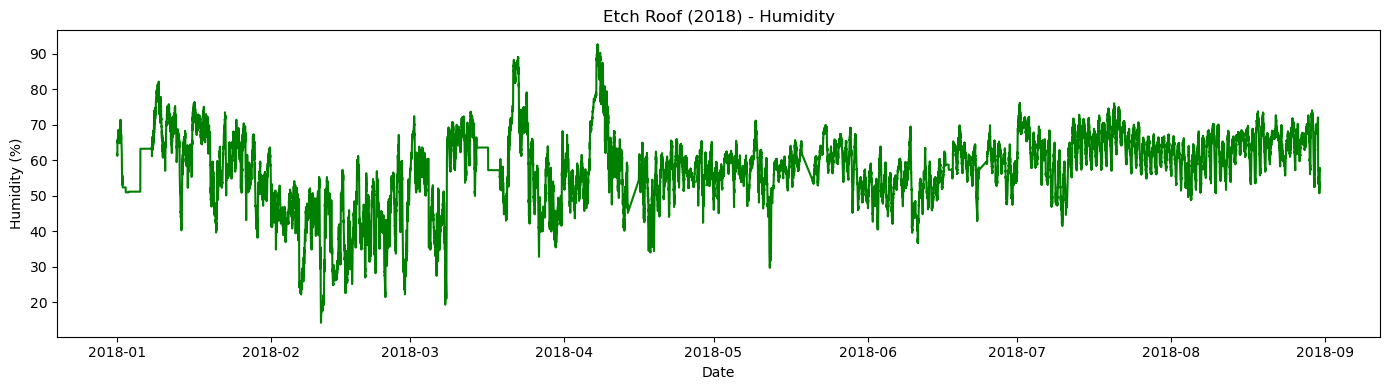

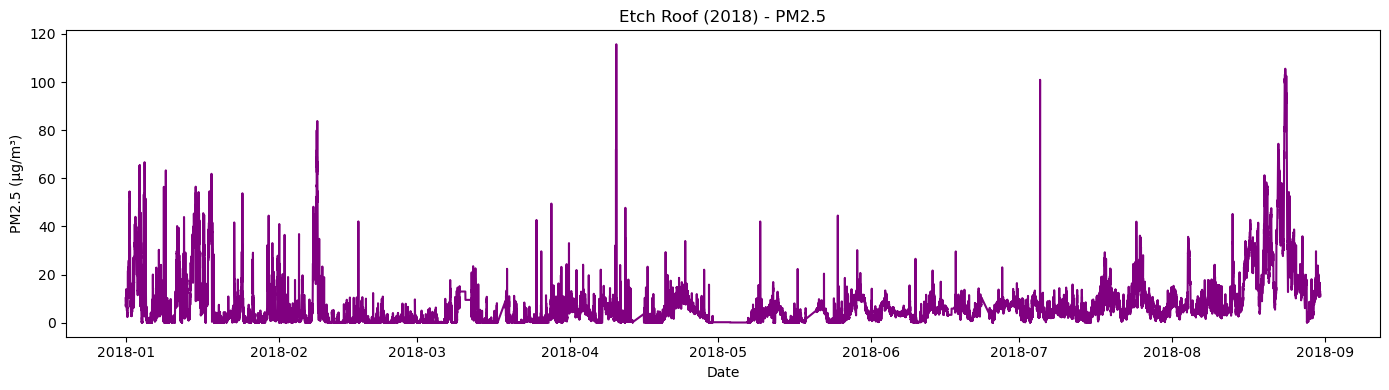

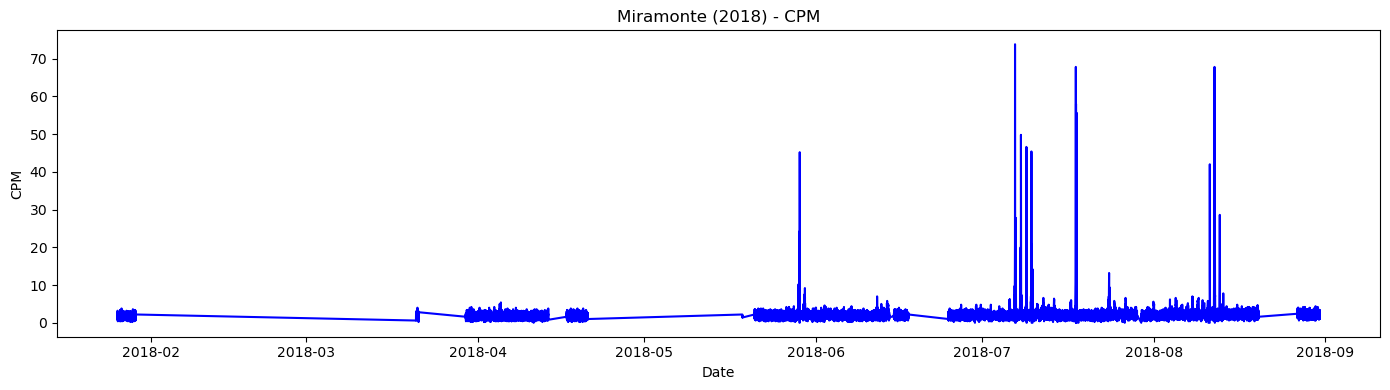

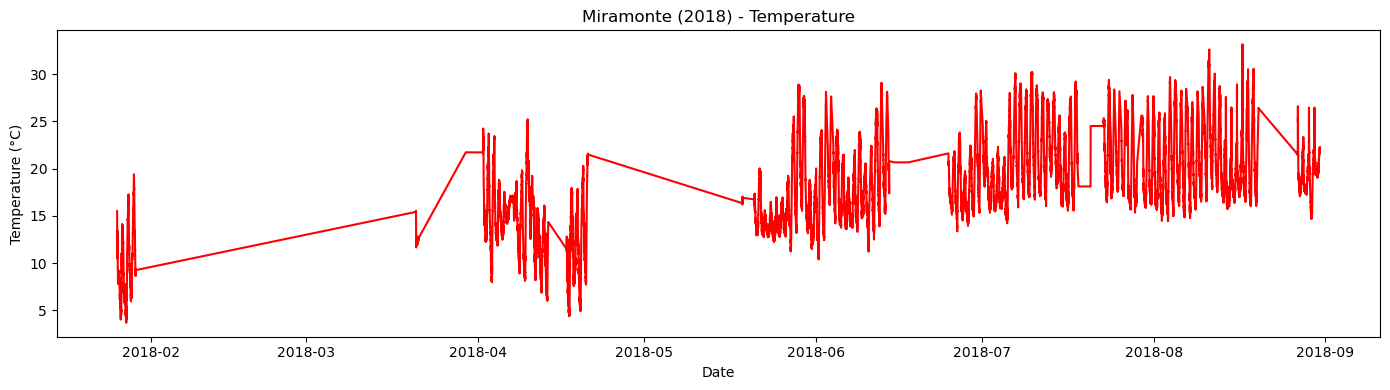

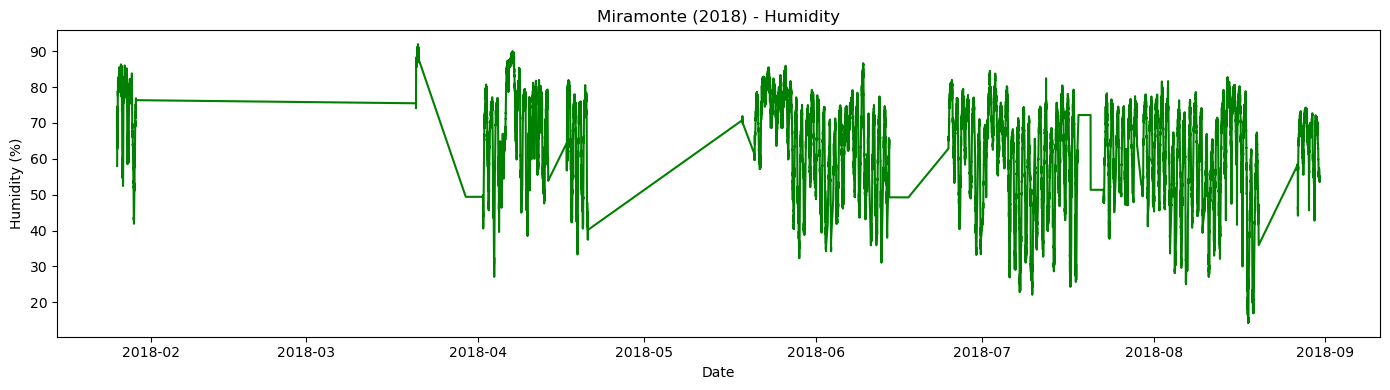

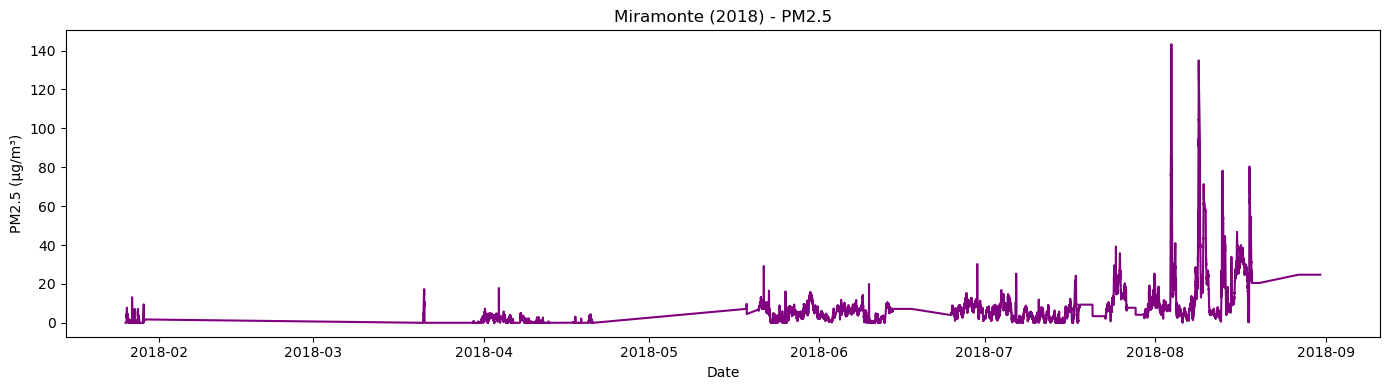

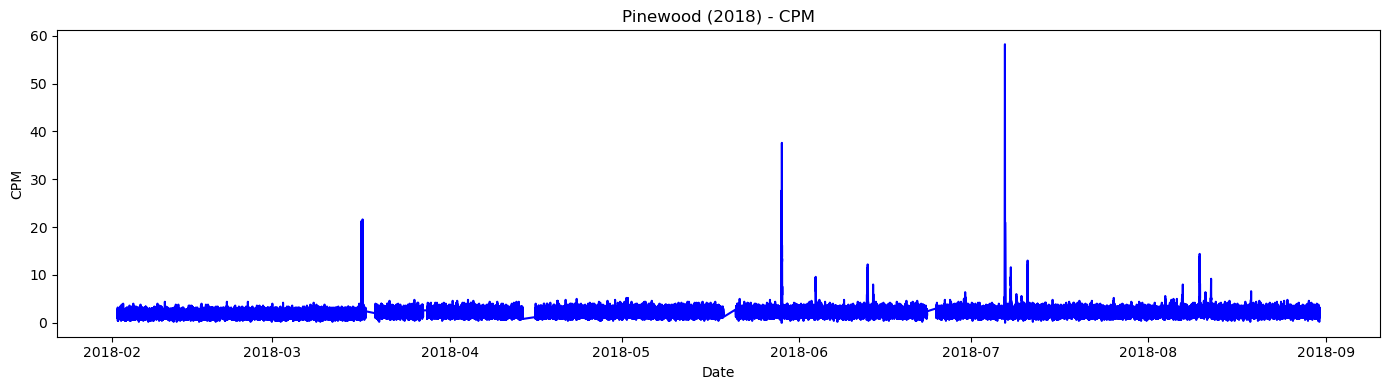

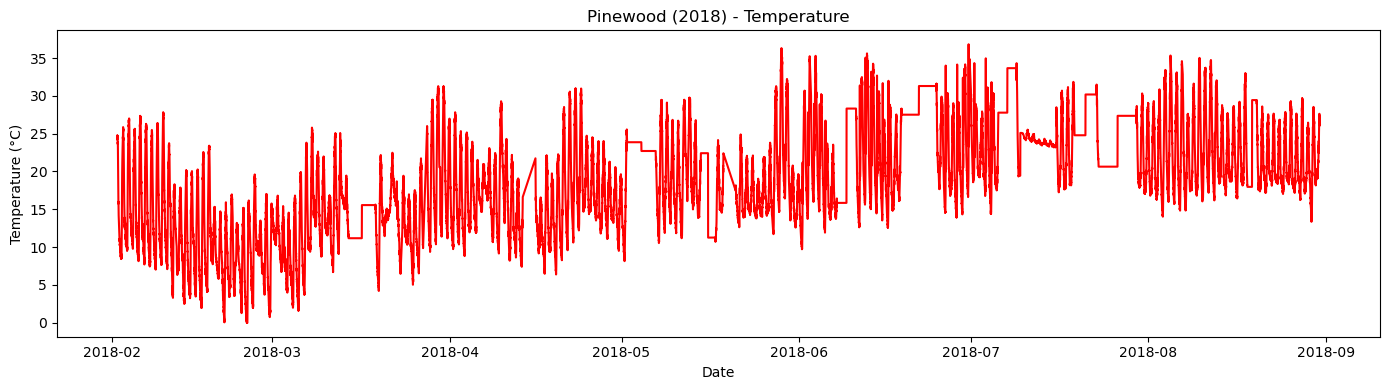

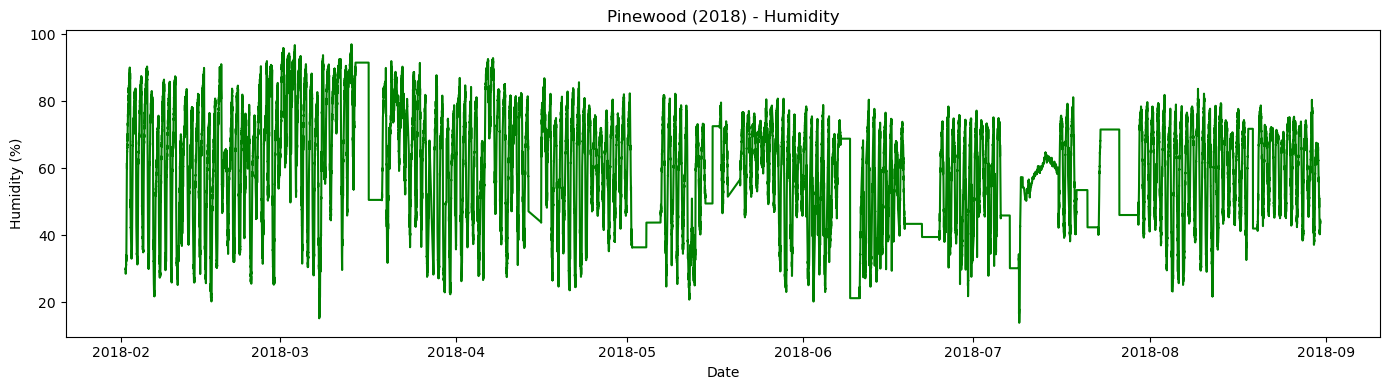

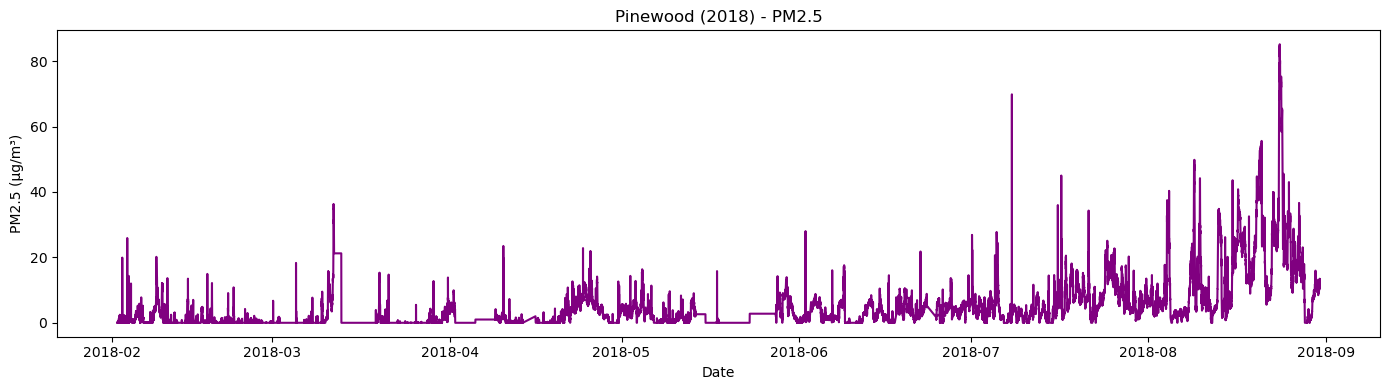

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

etch = pd.read_csv('https://dl.dropboxusercontent.com/s/tc6s7f6xl05kwzh/etch_roof.csv?dl=1')
etch_weather = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/etch_roof_weather.csv')
etch_aq = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/etch_roof_aq.csv')

miramonte = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os.csv')
mm_weather = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os_weather.csv')
miramonte_aq = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os_aq.csv')

pinewood = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os.csv')
pw_weather = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os_weather.csv')
pw_aq = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os_aq.csv')

def prepare_data(rad_df, weather_df, aq_df):
    merged = pd.merge_asof(rad_df.sort_values('deviceTime_unix'),
                           weather_df.sort_values('deviceTime_unix'),
                           on='deviceTime_unix', direction='nearest')
    merged = pd.merge_asof(merged.sort_values('deviceTime_unix'),
                           aq_df.sort_values('deviceTime_unix'),
                           on='deviceTime_unix', direction='nearest')
    merged['datetime'] = pd.to_datetime(merged['deviceTime_unix'], unit='s')
    
    return merged[(merged['datetime'] >= '2018-01-01') & (merged['datetime'] <= '2018-08-31')]


etch_data = prepare_data(etch, etch_weather, etch_aq)
miramonte_data = prepare_data(miramonte, mm_weather, miramonte_aq)
pinewood_data = prepare_data(pinewood, pw_weather, pw_aq)

def plot_variable(df, column, title, ylabel, color):
    plt.figure(figsize=(14, 4))
    sns.lineplot(data=df, x='datetime', y=column, color=color)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

plot_variable(etch_data, 'cpm', 'Etch Roof (2018) - CPM', 'CPM', 'blue')
plot_variable(etch_data, 'temperature', 'Etch Roof (2018) - Temperature', 'Temperature (°C)', 'red')
plot_variable(etch_data, 'humidity', 'Etch Roof (2018) - Humidity', 'Humidity (%)', 'green')
plot_variable(etch_data, 'PM25', 'Etch Roof (2018) - PM2.5', 'PM2.5 (µg/m³)', 'purple')


plot_variable(miramonte_data, 'cpm', 'Miramonte (2018) - CPM', 'CPM', 'blue')
plot_variable(miramonte_data, 'temperature', 'Miramonte (2018) - Temperature', 'Temperature (°C)', 'red')
plot_variable(miramonte_data, 'humidity', 'Miramonte (2018) - Humidity', 'Humidity (%)', 'green')
plot_variable(miramonte_data, 'PM25', 'Miramonte (2018) - PM2.5', 'PM2.5 (µg/m³)', 'purple')
plot_variable(pinewood_data, 'cpm', 'Pinewood (2018) - CPM', 'CPM', 'blue')
plot_variable(pinewood_data, 'temperature', 'Pinewood (2018) - Temperature', 'Temperature (°C)', 'red')
plot_variable(pinewood_data, 'humidity', 'Pinewood (2018) - Humidity', 'Humidity (%)', 'green')
plot_variable(pinewood_data, 'PM25', 'Pinewood (2018) - PM2.5', 'PM2.5 (µg/m³)', 'purple')


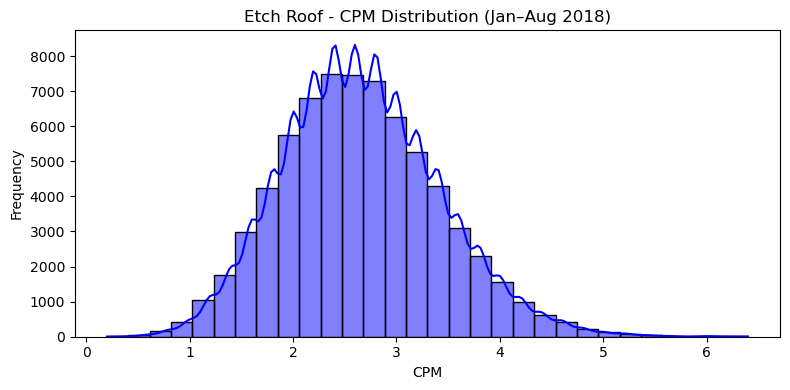

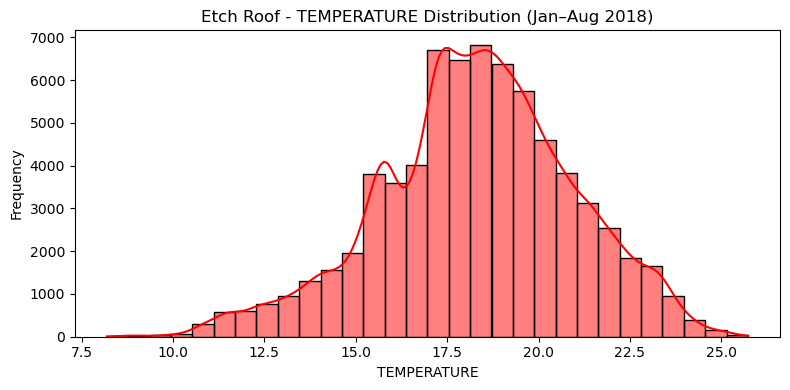

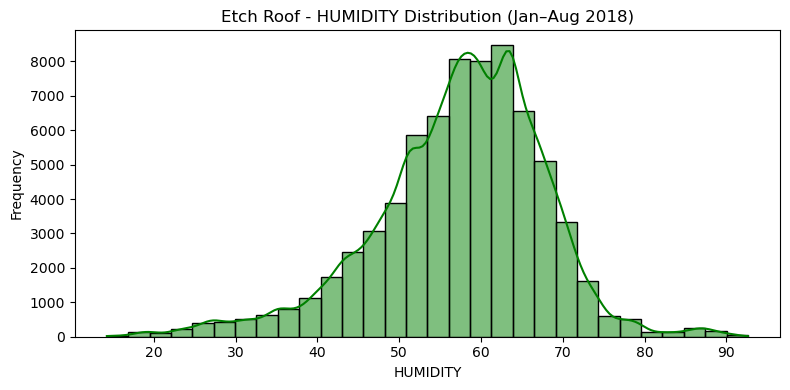

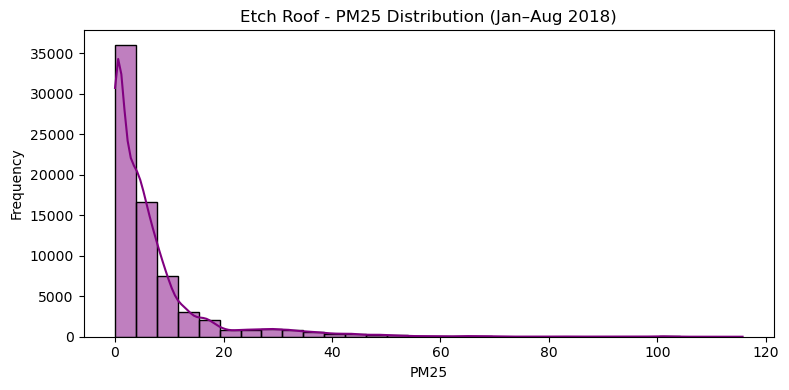

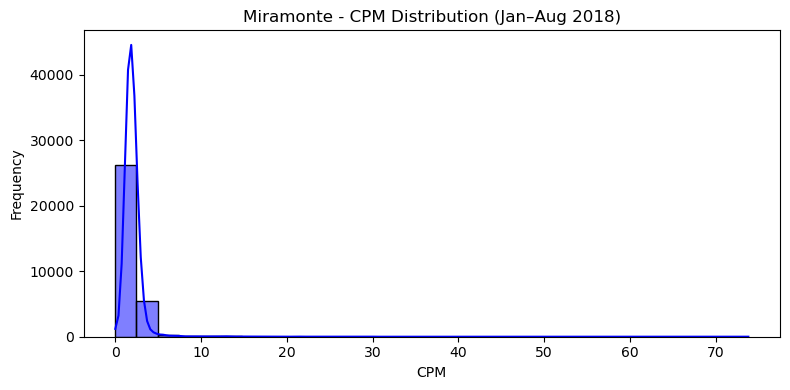

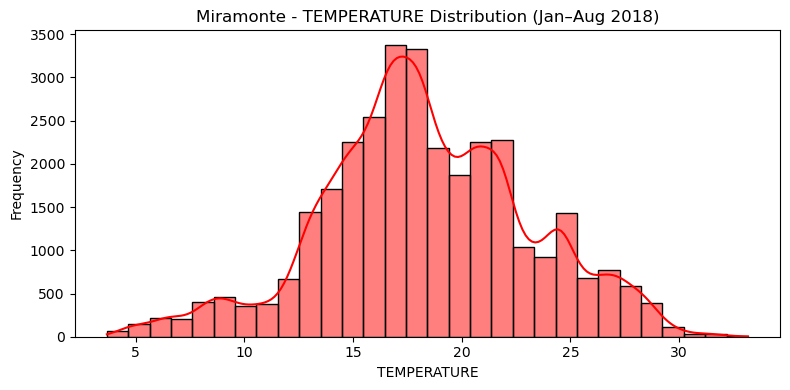

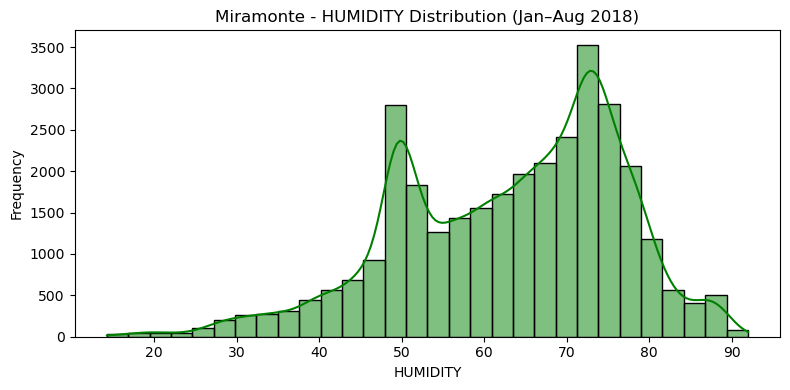

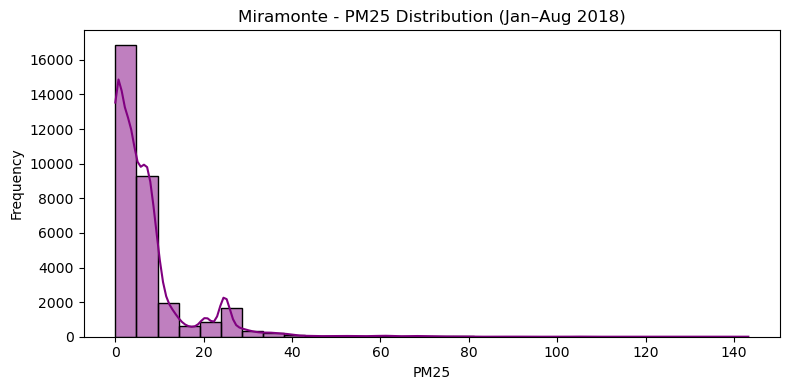

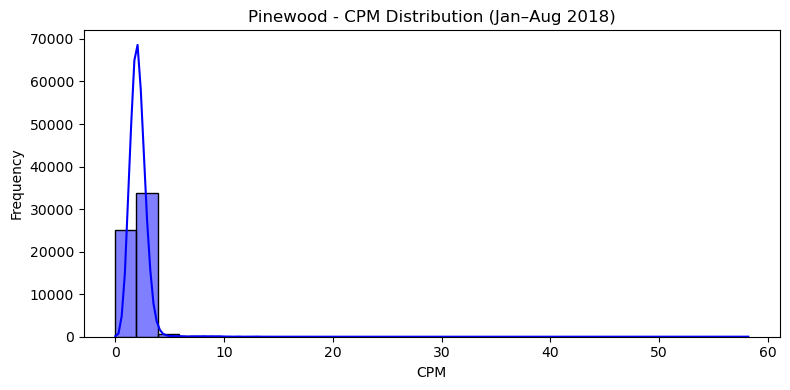

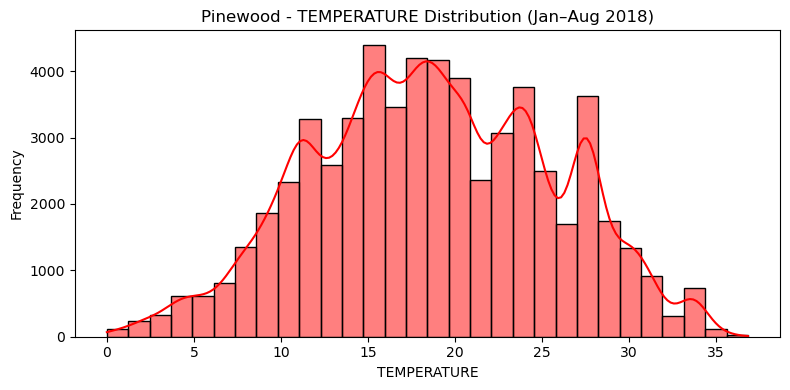

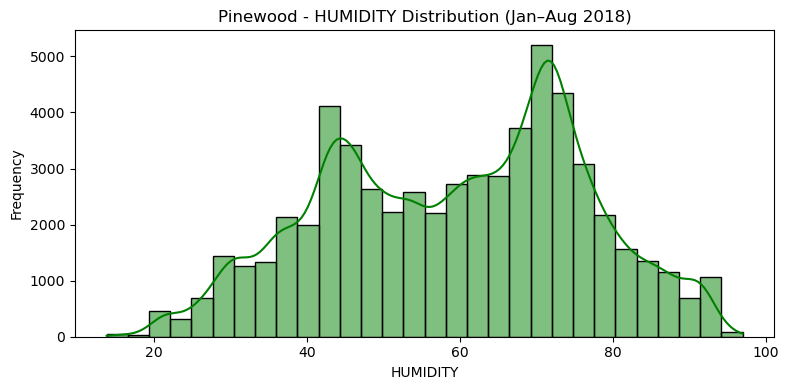

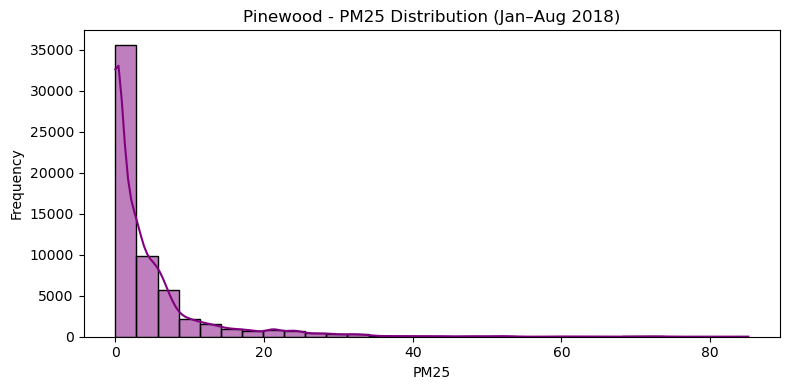

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

etch = pd.read_csv('https://dl.dropboxusercontent.com/s/tc6s7f6xl05kwzh/etch_roof.csv?dl=1')
etch_weather = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/etch_roof_weather.csv')
etch_aq = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/etch_roof_aq.csv')

miramonte = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os.csv')
mm_weather = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os_weather.csv')
miramonte_aq = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os_aq.csv')

pinewood = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os.csv')
pw_weather = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os_weather.csv')
pw_aq = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os_aq.csv')

def prepare_data(rad, weather, aq):
    df = pd.merge_asof(rad.sort_values('deviceTime_unix'),
                       weather.sort_values('deviceTime_unix'),
                       on='deviceTime_unix', direction='nearest')
    df = pd.merge_asof(df.sort_values('deviceTime_unix'),
                       aq.sort_values('deviceTime_unix'),
                       on='deviceTime_unix', direction='nearest')
    df['datetime'] = pd.to_datetime(df['deviceTime_unix'], unit='s')
    return df[(df['datetime'] >= '2018-01-01') & (df['datetime'] <= '2018-08-31')]

etch_data = prepare_data(etch, etch_weather, etch_aq)
miramonte_data = prepare_data(miramonte, mm_weather, miramonte_aq)
pinewood_data = prepare_data(pinewood, pw_weather, pw_aq)

def plot_histograms(df, location):
    variables = ['cpm', 'temperature', 'humidity', 'PM25']
    colors = ['blue', 'red', 'green', 'purple']
    for var, color in zip(variables, colors):
        plt.figure(figsize=(8, 4))
        sns.histplot(df[var].dropna(), kde=True, bins=30, color=color)
        plt.title(f'{location} - {var.upper()} Distribution (Jan–Aug 2018)')
        plt.xlabel(var.upper())
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

plot_histograms(etch_data, "Etch Roof")
plot_histograms(miramonte_data, "Miramonte")
plot_histograms(pinewood_data, "Pinewood")


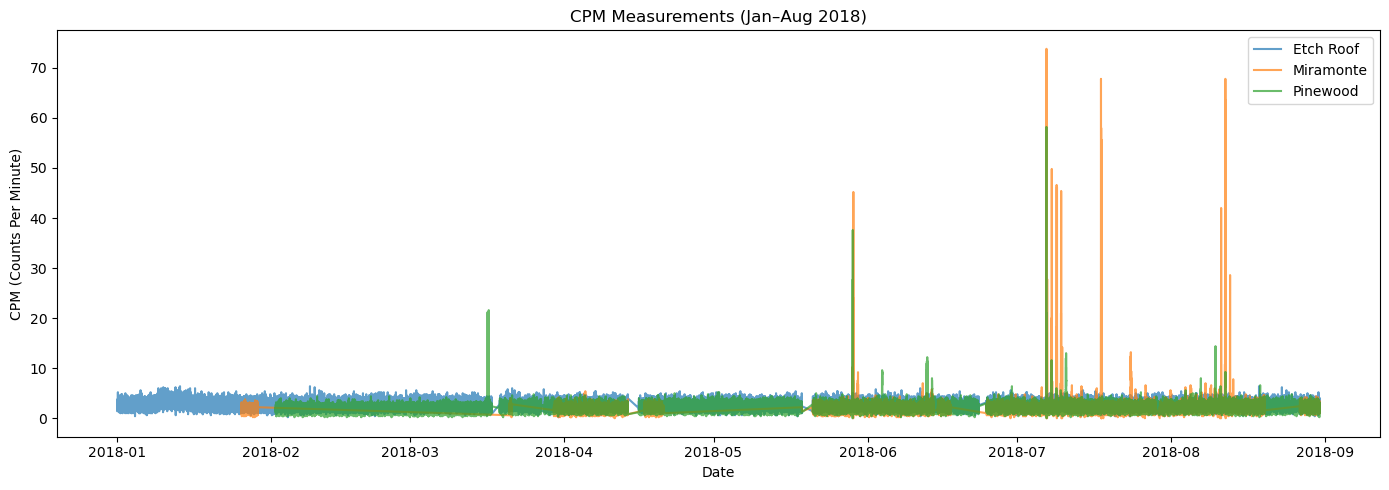

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

etch = pd.read_csv('https://dl.dropboxusercontent.com/s/tc6s7f6xl05kwzh/etch_roof.csv?dl=1')
miramonte = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os.csv')
pinewood = pd.read_csv('https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os.csv')

etch['datetime'] = pd.to_datetime(etch['deviceTime_unix'], unit='s')
miramonte['datetime'] = pd.to_datetime(miramonte['deviceTime_unix'], unit='s')
pinewood['datetime'] = pd.to_datetime(pinewood['deviceTime_unix'], unit='s')

etch = etch[(etch['datetime'] >= '2018-01-01') & (etch['datetime'] <= '2018-08-31')]
miramonte = miramonte[(miramonte['datetime'] >= '2018-01-01') & (miramonte['datetime'] <= '2018-08-31')]
pinewood = pinewood[(pinewood['datetime'] >= '2018-01-01') & (pinewood['datetime'] <= '2018-08-31')]

plt.figure(figsize=(14, 5))
plt.plot(etch['datetime'], etch['cpm'], label='Etch Roof', alpha=0.7)
plt.plot(miramonte['datetime'], miramonte['cpm'], label='Miramonte', alpha=0.7)
plt.plot(pinewood['datetime'], pinewood['cpm'], label='Pinewood', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('CPM (Counts Per Minute)')
plt.title('CPM Measurements (Jan–Aug 2018)')
plt.legend()
plt.tight_layout()
plt.show()


Etch Roof - CPM vs temperature:
  Pearson r = -0.035, p-value = 0.0000


C:\Users\Aram Valdez\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Aram Valdez\AppData\Local\Temp\ipykernel_19352\1838723265.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


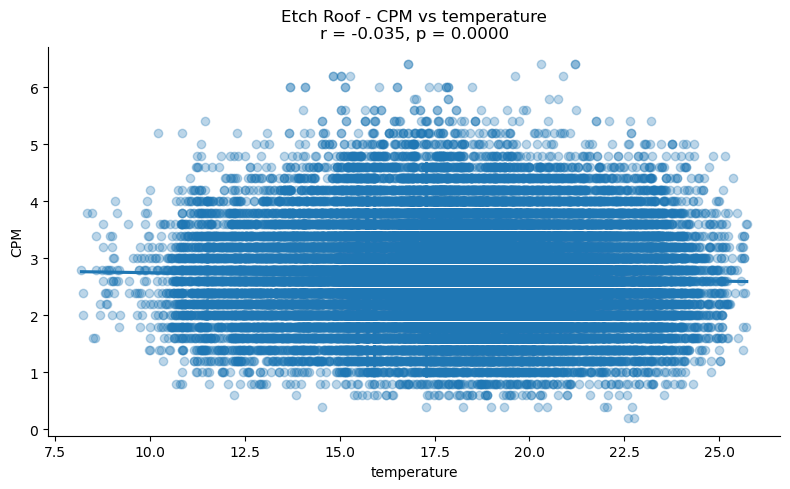

Etch Roof - CPM vs humidity:
  Pearson r = 0.040, p-value = 0.0000


C:\Users\Aram Valdez\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Aram Valdez\AppData\Local\Temp\ipykernel_19352\1838723265.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


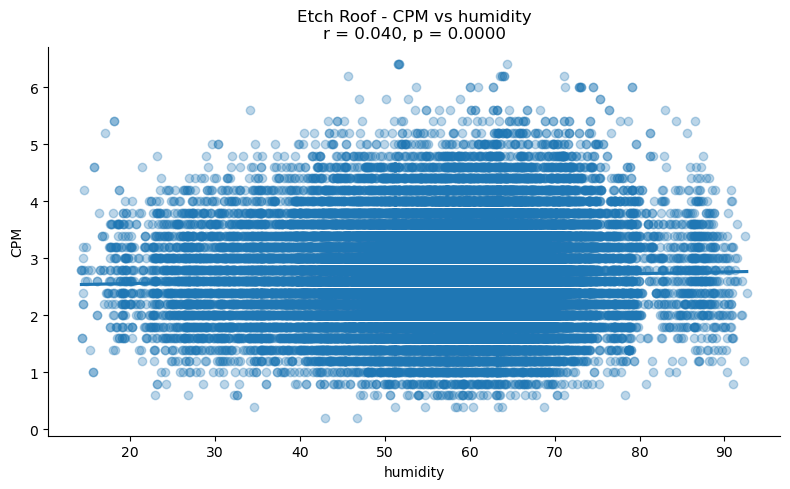

Etch Roof - CPM vs PM25:
  Pearson r = 0.033, p-value = 0.0000


C:\Users\Aram Valdez\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Aram Valdez\AppData\Local\Temp\ipykernel_19352\1838723265.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


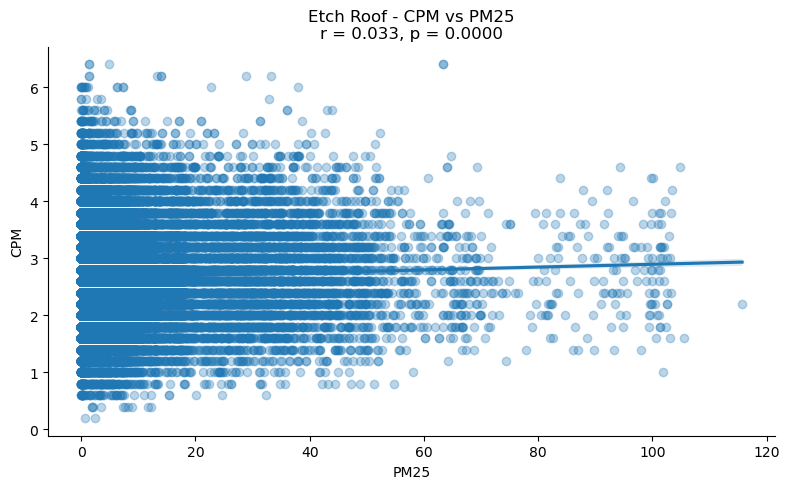

Miramonte - CPM vs temperature:
  Pearson r = 0.219, p-value = 0.0000


C:\Users\Aram Valdez\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Aram Valdez\AppData\Local\Temp\ipykernel_19352\1838723265.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


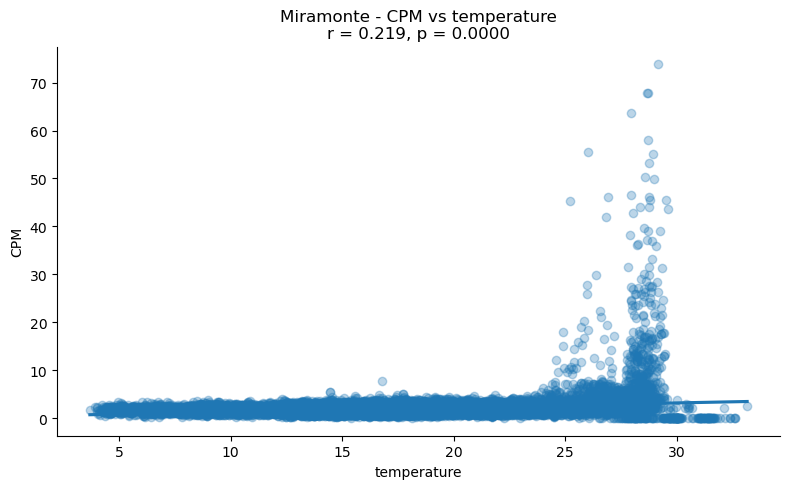

Miramonte - CPM vs humidity:
  Pearson r = -0.201, p-value = 0.0000


C:\Users\Aram Valdez\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Aram Valdez\AppData\Local\Temp\ipykernel_19352\1838723265.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


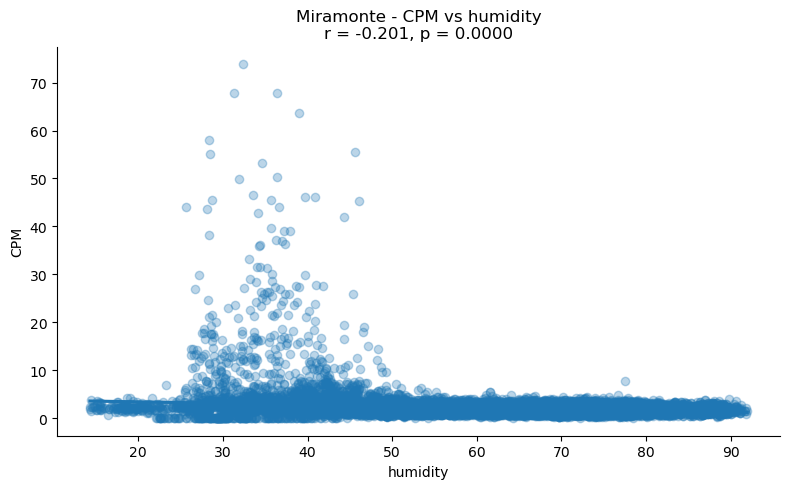

Miramonte - CPM vs PM25:
  Pearson r = 0.010, p-value = 0.0717


C:\Users\Aram Valdez\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Aram Valdez\AppData\Local\Temp\ipykernel_19352\1838723265.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


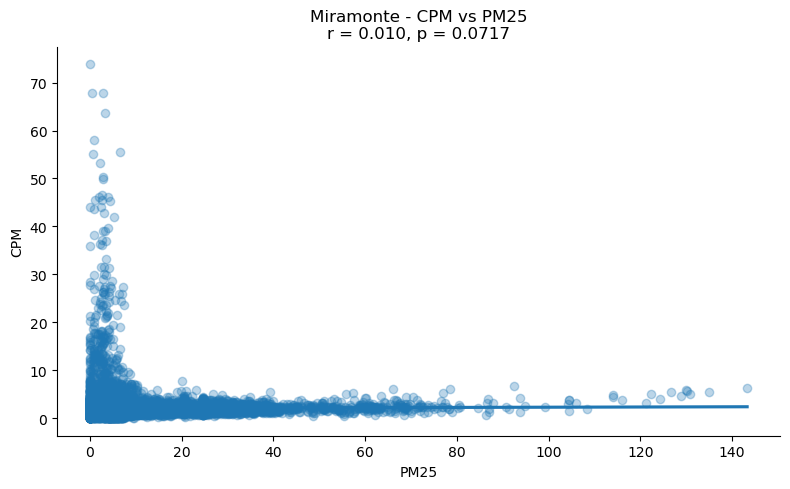

Pinewood - CPM vs temperature:
  Pearson r = 0.188, p-value = 0.0000


C:\Users\Aram Valdez\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Aram Valdez\AppData\Local\Temp\ipykernel_19352\1838723265.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


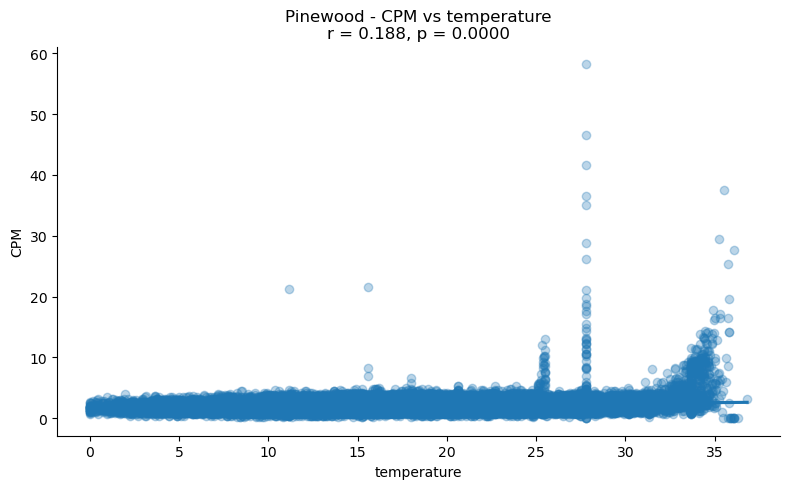

Pinewood - CPM vs humidity:
  Pearson r = -0.107, p-value = 0.0000


C:\Users\Aram Valdez\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Aram Valdez\AppData\Local\Temp\ipykernel_19352\1838723265.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


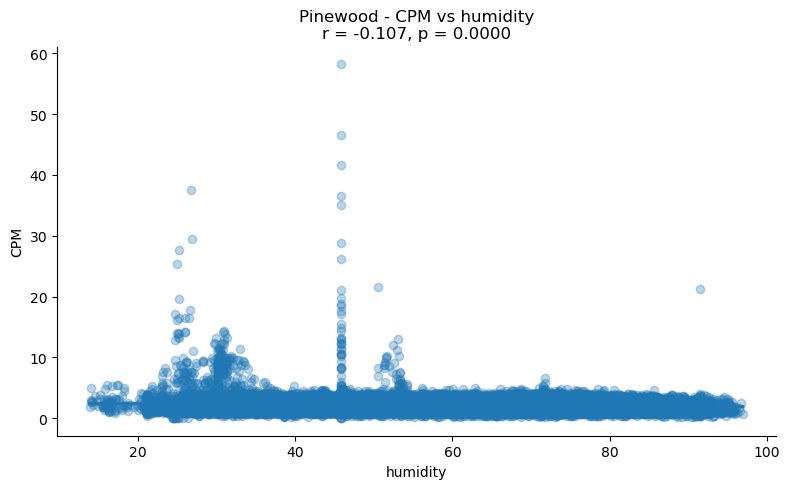

Pinewood - CPM vs PM25:
  Pearson r = 0.054, p-value = 0.0000


C:\Users\Aram Valdez\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Aram Valdez\AppData\Local\Temp\ipykernel_19352\1838723265.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


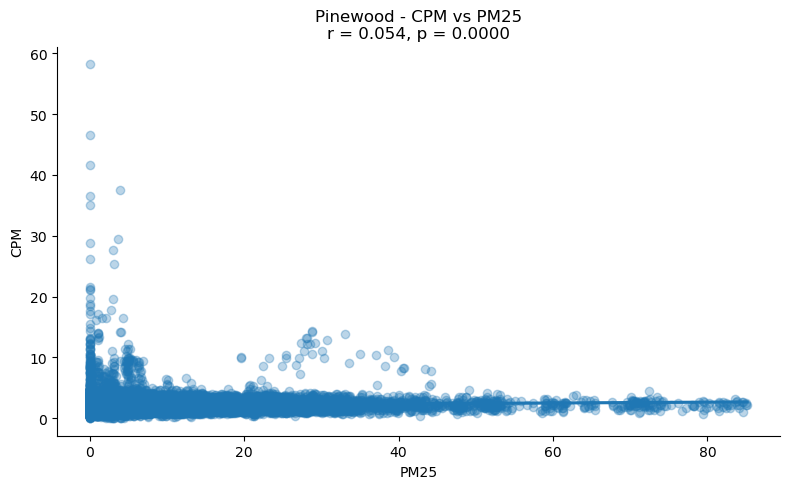

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def prepare_data(rad_url, weather_url, aq_url):
    rad = pd.read_csv(rad_url)
    weather = pd.read_csv(weather_url)
    aq = pd.read_csv(aq_url)
    
    df = pd.merge_asof(rad.sort_values('deviceTime_unix'),
                       weather.sort_values('deviceTime_unix'),
                       on='deviceTime_unix', direction='nearest')
    df = pd.merge_asof(df.sort_values('deviceTime_unix'),
                       aq.sort_values('deviceTime_unix'),
                       on='deviceTime_unix', direction='nearest')
    df['datetime'] = pd.to_datetime(df['deviceTime_unix'], unit='s')
    return df[(df['datetime'] >= '2018-01-01') & (df['datetime'] <= '2018-08-31')]

etch = prepare_data(
    'https://dl.dropboxusercontent.com/s/tc6s7f6xl05kwzh/etch_roof.csv?dl=1',
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/etch_roof_weather.csv',
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/etch_roof_aq.csv'
)

miramonte = prepare_data(
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os.csv',
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os_weather.csv',
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os_aq.csv'
)

pinewood = prepare_data(
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os.csv',
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os_weather.csv',
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os_aq.csv'
)

def analyze_correlation(df, location):
    variables = ['temperature', 'humidity', 'PM25']
    for var in variables:
        r, p = pearsonr(df[var].dropna(), df['cpm'][df[var].notna()])
        print(f"{location} - CPM vs {var}:\n  Pearson r = {r:.3f}, p-value = {p:.4f}")

        sns.lmplot(data=df, x=var, y='cpm', aspect=1.6, scatter_kws={'alpha':0.3})
        plt.title(f'{location} - CPM vs {var}\nr = {r:.3f}, p = {p:.4f}')
        plt.xlabel(var)
        plt.ylabel('CPM')
        plt.tight_layout()
        plt.show()

analyze_correlation(etch, "Etch Roof")
analyze_correlation(miramonte, "Miramonte")
analyze_correlation(pinewood, "Pinewood")


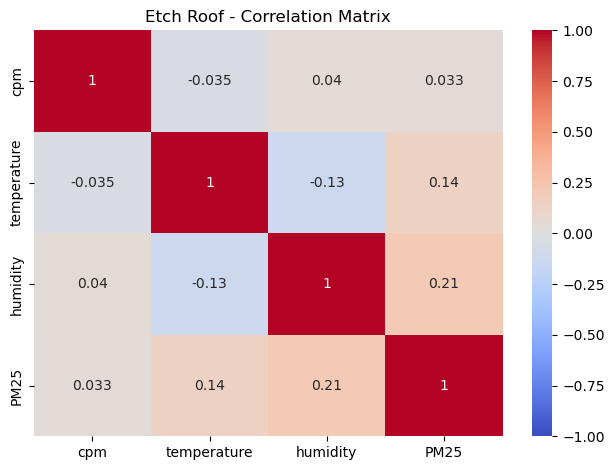

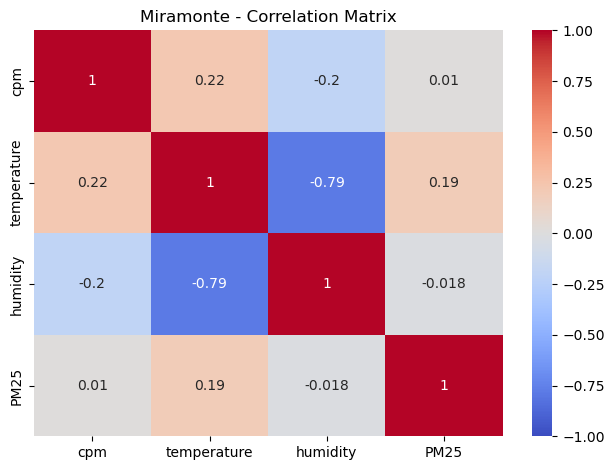

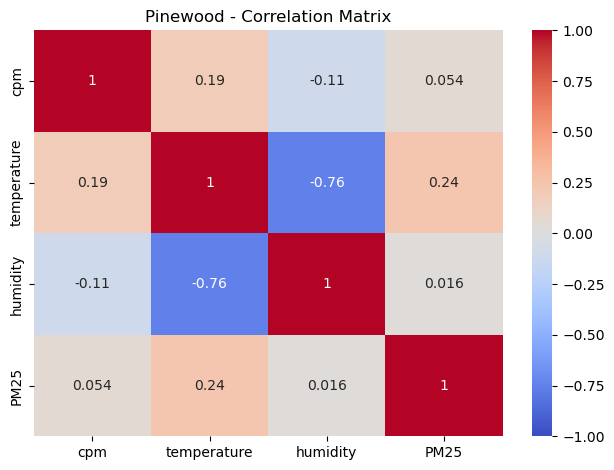

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_data(rad_url, weather_url, aq_url):
    rad = pd.read_csv(rad_url)
    weather = pd.read_csv(weather_url)
    aq = pd.read_csv(aq_url)
    
    merged = pd.merge_asof(rad.sort_values('deviceTime_unix'),
                           weather.sort_values('deviceTime_unix'),
                           on='deviceTime_unix', direction='nearest')
    merged = pd.merge_asof(merged.sort_values('deviceTime_unix'),
                           aq.sort_values('deviceTime_unix'),
                           on='deviceTime_unix', direction='nearest')
    merged['datetime'] = pd.to_datetime(merged['deviceTime_unix'], unit='s')
    return merged[(merged['datetime'] >= '2018-01-01') & (merged['datetime'] <= '2018-08-31')]

etch_data = prepare_data(
    'https://dl.dropboxusercontent.com/s/tc6s7f6xl05kwzh/etch_roof.csv?dl=1',
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/etch_roof_weather.csv',
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/etch_roof_aq.csv'
)

miramonte_data = prepare_data(
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os.csv',
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os_weather.csv',
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/miramonte_os_aq.csv'
)

pinewood_data = prepare_data(
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os.csv',
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os_weather.csv',
    'https://raw.githubusercontent.com/Isai-VB/E11_Twins/main/pinewood_os_aq.csv'
)

def plot_corr(df, title):
    corr = df[['cpm', 'temperature', 'humidity', 'PM25']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'{title} - Correlation Matrix')
    plt.tight_layout()
    plt.show()

plot_corr(etch_data, 'Etch Roof')
plot_corr(miramonte_data, 'Miramonte')
plot_corr(pinewood_data, 'Pinewood')
